In [ ]:
### NLP_Project_8_1st_Sentiment_Analy_TFIDF

In [2]:
import nltk
nltk.download('stopwords')
nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import os
data = pd.read_csv(r"/content/drive/My Drive/NLP/hotel_senti_train.csv",encoding='latin-1')
data_test = pd.read_csv(r"/content/drive/My Drive/NLP/hotel_senti_test.csv",encoding='latin-1')

# 1: happy
# 0: not happy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
data.shape

(38932, 5)

**Exploratory Data Analysis (EDA)**

In [6]:
data_eda = data.copy()

In [7]:
data_eda['Is_Response'] = data_eda['Is_Response'].map({'happy':1, 'not happy':0})

In [8]:
data_eda.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,0
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,0
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,1
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,0


In [9]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
pd.isnull(data_eda).sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [11]:
data_eda.groupby('Is_Response').describe()

User_ID                       ... Device_Used                       
              count unique      top freq  ...       count unique      top   freq
Is_Response                               ...                                   
0             12411  12411  id19554    1  ...       12411      3  Desktop   4431
1             26521  26521  id33497    1  ...       26521      3   Mobile  10602

[2 rows x 16 columns]

Obs:- We have 12411 'not happy' feedbacks and 26521 'happy' feedbacks

In [12]:
data_eda['Description_len'] = data_eda.Description.apply(len)
data_eda.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_len
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,0,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,0,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,0,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,1,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,0,1613


In [13]:
data_eda['Is_Response'] = data_eda['Is_Response'].map({1:'happy', 0:'not happy'})

In [14]:
data_eda.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_len
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1613


In [15]:
#Ratio
print ('not happy ratio = ', round(len(data_eda[data_eda['Is_Response']=='not happy']) / len(data_eda.Is_Response),2)*100,'%')
print ('happy ratio  = ', round(len(data_eda[data_eda['Is_Response']=='happy']) / len(data_eda.Is_Response),2)*100,'%')

not happy ratio =  32.0 %
happy ratio  =  68.0 %


In [16]:
#Label coding 0 and 1
data_eda['Is_Response'].replace({'not happy':0,'happy':1},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5, 0, 'Feedback Length')

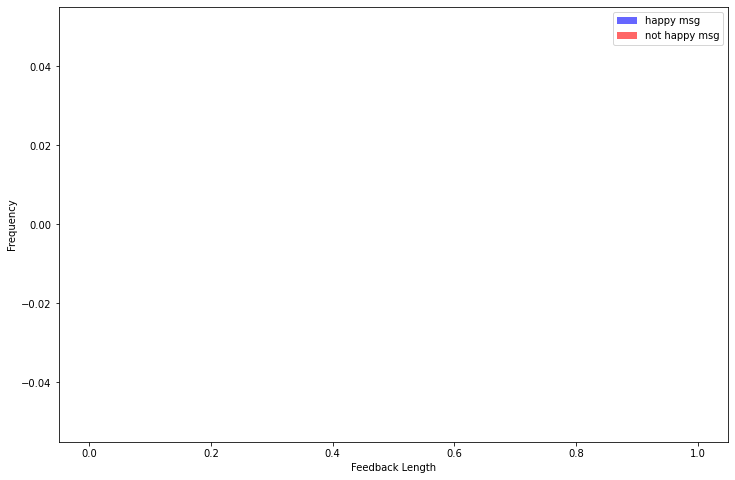

In [17]:
plt.figure(figsize=(12, 8))

data_eda[data_eda.Is_Response=='happy'].Description_len.plot(bins=35, kind='hist', color='blue', label='happy msg', alpha=0.6)
data_eda[data_eda.Is_Response=='not happy'].Description_len.plot(kind='hist', color='red', label='not happy msg', alpha=0.6)
plt.legend()
plt.xlabel("Feedback Length")

Obs:- Distribution are quite equal of lebal(Is_Response) column(1:happy, 0:not happy)

**Split Data in IV & DV**

In [18]:
filter_data = data.copy()
filter_data['Is_Response'] = filter_data['Is_Response'].map({'happy':1, 'not happy':0})
X_message=filter_data.iloc[:,1]
Y_class=filter_data.iloc[:,4]

**Data cleaning and preprocessing**

In [19]:
# make a dictionary of Contractions

contraction_mapping={
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**Cleaning the Text**

In [20]:
# function to pre-process the text
def cleaner(text):
    newString=re.sub(r"@[a-zA-Z0-9]+","",text)         # removing user mentions
    newString=re.sub("#","",newString) 
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    x=re.sub(r'http\S+','',newString)                  # remove URL's
    newString=re.sub(r"'s\b"," is",newString)         # removing 's
    x=re.sub(r'[%#@$&!+|ð¦±]','',newString)          # Remove spacial char
    x=re.sub(r'[.,:;]','',newString)                   # remove punctuations mark
    newString=re.sub("[^a-zA-Z]"," ",newString)         # fetching out only char
    #lower_case=letters_only.lower()                     # converting everything in lowercase
    words=newString.split()                            # split based on space to remove multiple spaces
    return (" ".join(words)).strip()

In [21]:
corpus = []
for i in range(0, len(X_message)):
  cleaned_text = cleaner(X_message[i])
  corpus.append(cleaned_text)

In [22]:
corpus[0]

'The room was kind of clean but had a VERY strong smell of dogs Generally below average but ok for a overnight stay if you are not too fussy Would consider staying again if the price was right Breakfast was free and just about better than nothing'

**Text Normalization (Stemming /Lammatization)**

In [23]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus_final = []
for i in range(0, len(corpus)):
    review = re.sub('[^a-zA-Z]', ' ', corpus[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_final.append(review)

In [25]:
corpus_final[3]

'stay husband son way alaska cruis love hotel great experi ask room north tower face north west best view high floor stun view needl citi even cruis ship order room servic dinner could enjoy perfect view room servic dinner delici perfect spot walk everywher enjoy citi almost forgot heavenli bed heavenli'

**Prepare Test Dataset**

In [26]:
X_message_test=data_test.iloc[:,1]

In [27]:
corpus_test = []
for i in range(0, len(X_message_test)):
  cleaned_text_test = cleaner(X_message_test[i])
  corpus_test.append(cleaned_text_test)

In [28]:
corpus_test[0]

'Looking for a motel in close proximity to TV taping of a Dr Phil show we chose the Dunes on Sunset Blvd in West Hollywood Although the property displayed the AAA emblem it certainly left a lot to be desired There were chips scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full apparently not replaced by housekeeping We needed an early wakeup call but could not use the clock radio alarm as there was not a radio in the room There was no TV channel listing on the remote or on the TV menu making viewing a chore The TV remote had to be returned when checking out This place served its purpose but not a place to revisit'

In [29]:
ps_test = PorterStemmer()
corpus_final_test = []
for i in range(0, len(corpus_test)):
    review = re.sub('[^a-zA-Z]', ' ', corpus_test[i])
    review = review.lower()
    review = review.split()
    review = [ps_test.stem(word) for word in review if not word in stopwords.words('english')]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_final_test.append(review)

In [30]:
corpus_final_test[0]

'look motel close proxim tv tape dr phil show chose dune sunset blvd west hollywood although properti display aaa emblem certainli left lot desir chip scrape bottom door frame bathroom lotion contain half full appar replac housekeep need earli wakeup call could use clock radio alarm radio room tv channel list remot tv menu make view chore tv remot return check place serv purpos place revisit'

**After Cleaning Now Convert Corpus in BOW (Docuents Matrix wrt Words)**/
**(Vector Space Modelling)**

In [31]:
## Applying Countvectorizer on test data
# from sklearn.feature_extraction.text import CountVectorizer
# cv_test = CountVectorizer(max_features=5000,ngram_range=(1,3))
# X_test = cv_test.fit_transform(corpus_final_test).toarray()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_test=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_test_val=tfidf_test.fit_transform(corpus_final_test).toarray()

In [33]:
## Applying Countvectorizer On Train data
# # Creating the Bag of Words model
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# X_train = cv.fit_transform(corpus_final).toarray()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_train=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_train.fit_transform(corpus).toarray()

In [36]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
print("X_shape",X.shape)
print("y_class",Y_class.shape)
print("X_Type",type(X))
print("Y_Type",type(Y_class))
print("-----------------------------")
Y = Y_class.values
print("Y_Type",type(Y_train))

X_shape (38932, 5000)
y_class (38932,)
X_Type <class 'numpy.ndarray'>
Y_Type <class 'pandas.core.series.Series'>
-----------------------------
Y_Type <class 'numpy.ndarray'>


In [39]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [40]:
# Examine the vocabulary and document-term matrix together
my_corpus = pd.DataFrame(X_train, columns=tfidf_train.get_feature_names())

In [41]:
my_corpus.head(2)

,able,able to,able to get,about,about it,about minute,about minutes,about the,about the hotel,about this,about this hotel,above,above and,above and beyond,above the,absolutely,ac,acceptable,access,access to,access to the,accessible,accommodating,accommodations,accomodating,across,across from,across the,across the street,action,activities,actually,add,added,addition,additional,adequate,adjacent,adjoining,adults,...,you cannot,you could,you do,you do not,you feel,you get,you go,you had,you have,you have to,you just,you know,you like,you may,you might,you need,you need to,you pay,you pay for,you should,you stay,you the,you to,you walk,you want,you want to,you were,you will,you will be,you will not,you would,you would expect,young,your,your car,your own,your room,your stay,yourself,zoo
0,0.0,0.0,0.0,0.034437,0.069955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065072,0.0,0.0,0.080538,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**Modeling**

In [43]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
hotel_review_model = MultinomialNB().fit(X_train, Y_train)
hotel_review_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
# implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC_model = PassiveAggressiveClassifier(n_iter_no_change=50)
PAC_model.fit(X_train, Y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=50,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [50]:
!pip install xgboost
#!pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

In [51]:
from xgboost import XGBClassifier
#lf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)
XGB_model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
XGB_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
y_pred=XGB_model.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [52]:
print("NB Training Accuracy:",hotel_review_model.score(X_train,Y_train))
print("NB Testing Accuracy:",hotel_review_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("RF Training Accuracy:",rf_model.score(X_train,Y_train))
print("RF Testing Accuracy:",rf_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("PAC Training Accuracy:",PAC_model.score(X_train,Y_train))
print("PAC Testing Accuracy:",PAC_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("XGB Training Accuracy:",XGB_model.score(X_train,Y_train))
print("XBG Testing Accuracy:",XGB_model.score(X_test,Y_test))

NB Training Accuracy: 0.867169690158934
NB Testing Accuracy: 0.8610504687299345
--------------------------------------------------------------------
RF Training Accuracy: 1.0
RF Testing Accuracy: 0.8506485167587003
--------------------------------------------------------------------
PAC Training Accuracy: 0.9456413549526409
PAC Testing Accuracy: 0.8539874149223065
--------------------------------------------------------------------
XGB Training Accuracy: 0.8969658051051533
XBG Testing Accuracy: 0.8663156542956209


[[1787  715]
 [ 367 4918]]


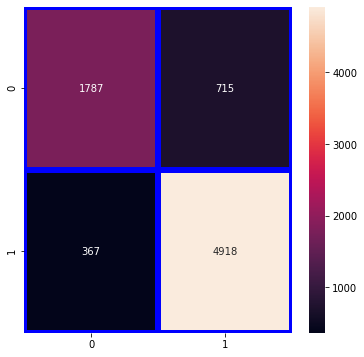

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      2502
           1       0.87      0.93      0.90      5285

    accuracy                           0.86      7787
   macro avg       0.85      0.82      0.83      7787
weighted avg       0.86      0.86      0.86      7787



In [53]:
Ya = Y_test  # Real Value
Yp = hotel_review_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(Ya,Yp)
print(cm_NB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_NB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[1546  956]
 [ 207 5078]]


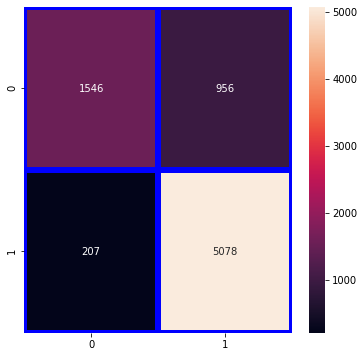

              precision    recall  f1-score   support

           0       0.88      0.62      0.73      2502
           1       0.84      0.96      0.90      5285

    accuracy                           0.85      7787
   macro avg       0.86      0.79      0.81      7787
weighted avg       0.85      0.85      0.84      7787



In [54]:
Ya = Y_test  # Real Value
Yp = rf_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(Ya,Yp)
print(cm_RF)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_RF,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[1875  627]
 [ 510 4775]]


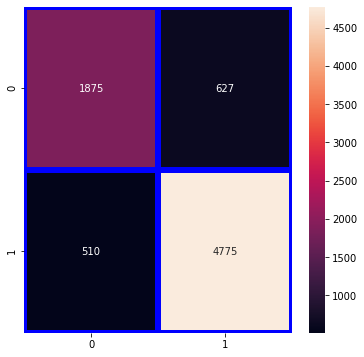

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2502
           1       0.88      0.90      0.89      5285

    accuracy                           0.85      7787
   macro avg       0.84      0.83      0.83      7787
weighted avg       0.85      0.85      0.85      7787



In [55]:
Ya = Y_test  # Real Value
Yp = PAC_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_PAC = confusion_matrix(Ya,Yp)
print(cm_PAC)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_PAC,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[1801  701]
 [ 340 4945]]


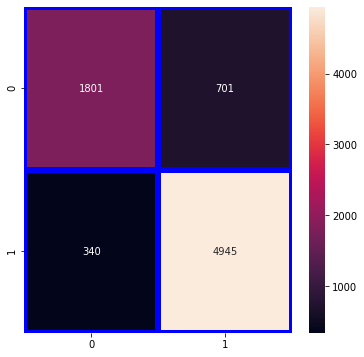

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      2502
           1       0.88      0.94      0.90      5285

    accuracy                           0.87      7787
   macro avg       0.86      0.83      0.84      7787
weighted avg       0.86      0.87      0.86      7787



In [56]:
Ya = Y_test  # Real Value
Yp = XGB_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_XGB = confusion_matrix(Ya,Yp)
print(cm_XGB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_XGB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.16285992 0.8371401 ]
 [0.4348114  0.5651886 ]
 [0.06525409 0.9347459 ]
 ...
 [0.9162177  0.08378229]
 [0.9598593  0.04014069]
 [0.39493906 0.60506094]]
Length of X_test:  7787
length of Log_Model_prob:  7787
      Ya  Yp
0      1   1
1      1   1
2      1   1
3      1   1
4      1   1
...   ..  ..
7782   1   1
7783   0   0
7784   0   0
7785   0   0
7786   0   1

[7787 rows x 2 columns]
Prob. of 1 at given X:  [0.8371401  0.5651886  0.9347459  ... 0.08378229 0.04014069 0.60506094]
AUC is 0.93


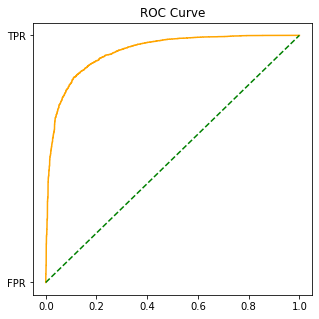

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
XGB_model_probability = XGB_model.predict_proba(X_test)
print(XGB_model_probability)

print("Length of X_test: ",len(X_test))
print("length of Log_Model_prob: ",len(XGB_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = XGB_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(Y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(Y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)

In [66]:
## Get Features names
feature_names = tfidf_train.get_feature_names()
feature_names

['able',
 'able to',
 'able to get',
 'about',
 'about it',
 'about minute',
 'about minutes',
 'about the',
 'about the hotel',
 'about this',
 'about this hotel',
 'above',
 'above and',
 'above and beyond',
 'above the',
 'absolutely',
 'ac',
 'acceptable',
 'access',
 'access to',
 'access to the',
 'accessible',
 'accommodating',
 'accommodations',
 'accomodating',
 'across',
 'across from',
 'across the',
 'across the street',
 'action',
 'activities',
 'actually',
 'add',
 'added',
 'addition',
 'additional',
 'adequate',
 'adjacent',
 'adjoining',
 'adults',
 'advance',
 'advantage',
 'advantage of',
 'advertised',
 'advice',
 'advised',
 'advisor',
 'affinia',
 'affordable',
 'after',
 'after long',
 'after reading',
 'after the',
 'after we',
 'afternoon',
 'again',
 'again and',
 'again but',
 'again for',
 'again if',
 'again in',
 'again the',
 'again we',
 'age',
 'agent',
 'ago',
 'agree',
 'ahead',
 'air',
 'air conditioner',
 'air conditioning',
 'airport',
 'airport a

**Find Most +ve and -ve words form reviews**

In [67]:
### Print most +ve (Real) words 
list_positive=sorted(zip(PAC_model.coef_[0], feature_names), reverse=True)[:50]

In [ ]:
# # extract only the word and not the similarity score
words_positive = list(map(lambda x: x[1], list_positive))

In [ ]:
words_positive

['definitely stay',
 'hotel itself',
 'were on',
 'went out of',
 'forward',
 'will be back',
 'gem',
 'there are no',
 'great',
 'will stay here',
 'beautifully',
 'only thing',
 'crowne plaza',
 'easy walking',
 'perfect',
 'is close',
 'pleasantly surprised',
 'immaculate',
 'right across',
 'above and beyond',
 'the next day',
 'elegant',
 'as well as',
 'loved',
 'not have any',
 'but there are',
 'very close',
 'only negative',
 'terrific',
 'enjoyable',
 'not have to',
 'in great',
 'location of',
 'pleased',
 'would definately',
 'outstanding',
 'very nice',
 'spotless',
 'spacious',
 'in my opinion',
 'excellent',
 'not need',
 'come back',
 'no complaints',
 'that did not',
 'comfortable we',
 'of times',
 'amazing',
 'the future',
 'thank you']

**Plot +Ve & -Ve words Using WordClud**

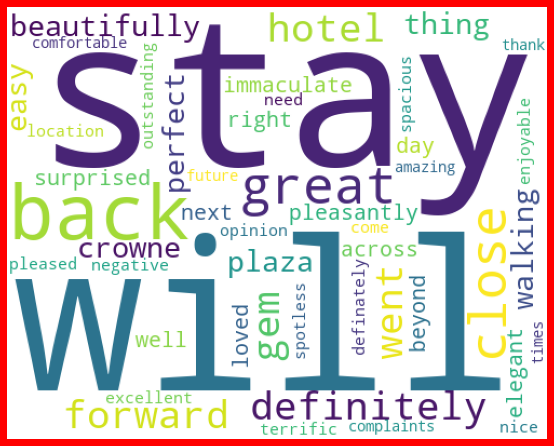

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
spam_cloud = WordCloud(width=500,height=400,background_color='white',max_words=50).generate(' '.join(words_positive))
plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
### Print most -ve (Fakest) words 
list_nigative = sorted(zip(PAC_model.coef_[0], feature_names))[:50]

In [ ]:
# # extract only the word and not the similarity score
words_nigative = list(map(lambda x: x[1], list_nigative))

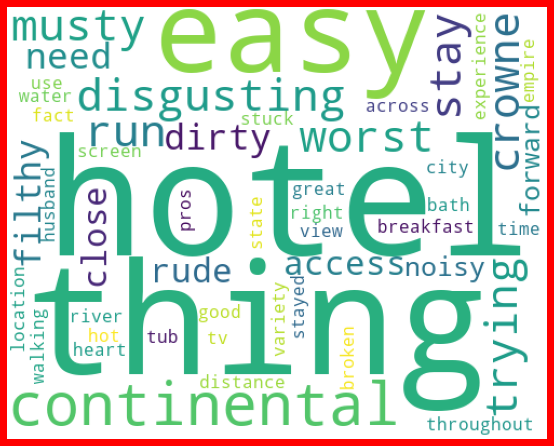

In [ ]:
spam_cloud = WordCloud(width=500,height=400,background_color='white',max_words=50).generate(' '.join(words_nigative))
plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Create Submition file**

In [75]:
y_pred_val=XGB_model.predict(X_test_val)

In [76]:
my_submission = pd.DataFrame({'User_ID': data_test.User_ID, 'predictions':y_pred_val})
my_submission.to_csv('NLP_Project_1st_Submission_XGB.csv', index=False)